### *Extrovert vs. Introvert Personality Traits Dataset, a rich collection of behavioral and social data designed to explore the spectrum of human personality. This dataset captures key indicators of extroversion and introversion, making it a valuable resource for psychologists, data scientists, and researchers studying social behavior, personality prediction, or data preprocessing techniques.*

* The domain knowledge provided in the kaggle source:
  
  - Time_spent_Alone: Hours spent alone daily (0–11).
  
  - Stage_fear: Presence of stage fright (Yes/No).
    
  - Social_event_attendance: Frequency of social events (0–10).
    
  - Going_outside: Frequency of going outside (0–7).
    
  - Drained_after_socializing: Feeling drained after socializing (Yes/No).
    
  - Friends_circle_size: Number of close friends (0–15).
    
  - Post_frequency: Social media post frequency (0–10).
     
  - Personality: Target variable (Extrovert/Introvert).*


In [23]:
import pandas as pd

In [ ]:
    df = pd.read_csv("D:\personality_dataset.csv")

In [25]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [26]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


#### ensured the data description corresponds to the domain knowledge 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [28]:
df.shape

(2900, 8)

In [29]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

### Before Imputing, we have to encode the categorical columns first

In [30]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [31]:
print(f"stage fear values : {df['Stage_fear'].value_counts()} \n drained after socializing values : {df['Drained_after_socializing'].value_counts()}")

stage fear values : Stage_fear
No     1417
Yes    1410
Name: count, dtype: int64 
 drained after socializing values : Drained_after_socializing
No     1441
Yes    1407
Name: count, dtype: int64


In [32]:
stageFear = {
    'No':0,
    'Yes':1
}
df['Stage_fear'] = df['Stage_fear'].map(stageFear)

drainedAfterSocializing={
    'No':0,
    'Yes':1
}
df['Drained_after_socializing'] = df['Drained_after_socializing'].map(drainedAfterSocializing)

personality = {
    'Introvert': 1,
    'Extrovert': 0
}
df['Personality'] = df['Personality'].map(personality)

In [33]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,0
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,1
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,1
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,0
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,0


### Now we can impute the nulls

In [34]:
for feature in df.columns[:-1]:
    df[feature].fillna(df[feature].mode()[0],inplace = True)

C:\Users\CompuFast\AppData\Local\Temp\ipykernel_11532\4332822.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mode()[0],inplace = True)


In [35]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [36]:
for feature in df.columns[:-1]:
    print(df[feature].duplicated().sum())

2888
2898
2889
2892
2898
2884
2889


### it is normal to see duplicates here as the ranges are so tight and removing them will affect the model badly


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization

In [38]:
df['Personality'].value_counts()

Personality
0    1491
1    1409
Name: count, dtype: int64

Text(0.5, 1.0, 'Personality Distribution')

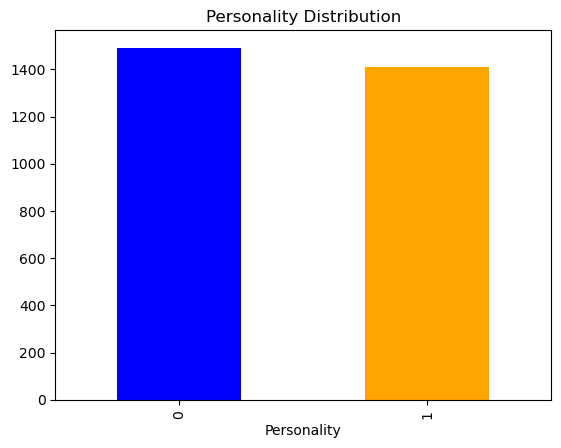

In [39]:
df['Personality'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Personality Distribution')

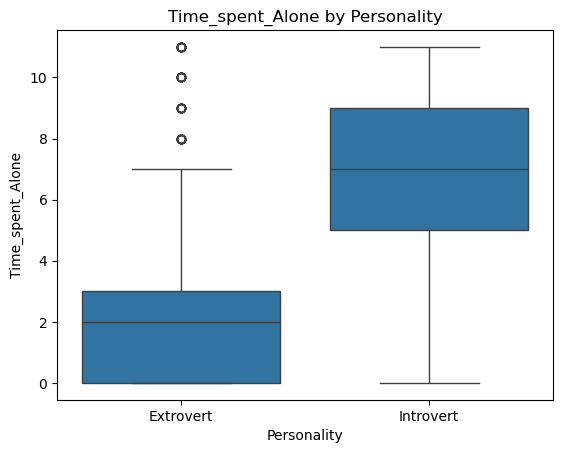

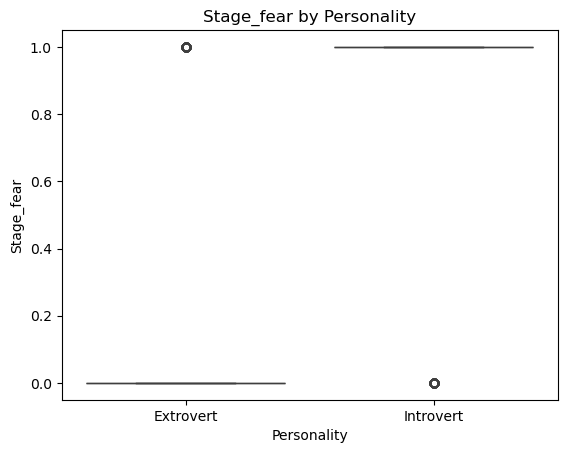

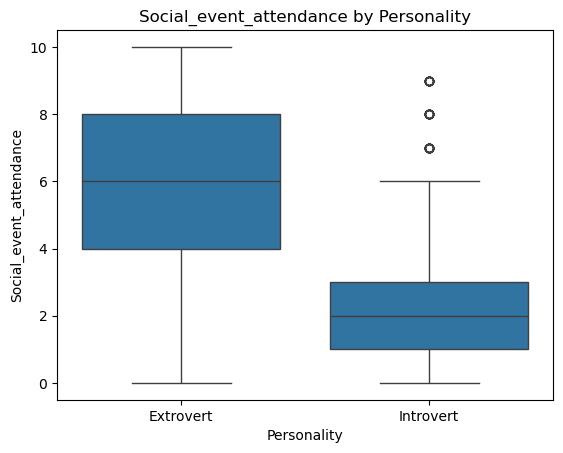

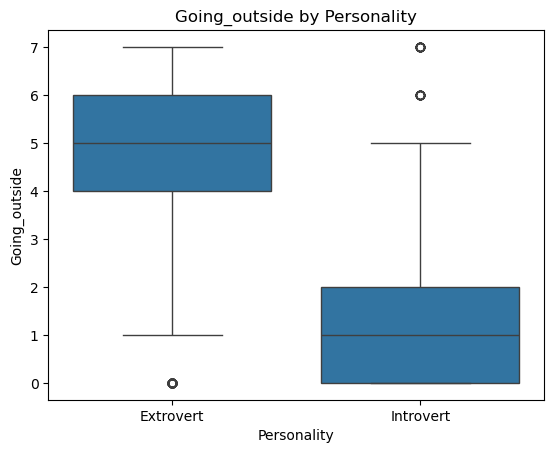

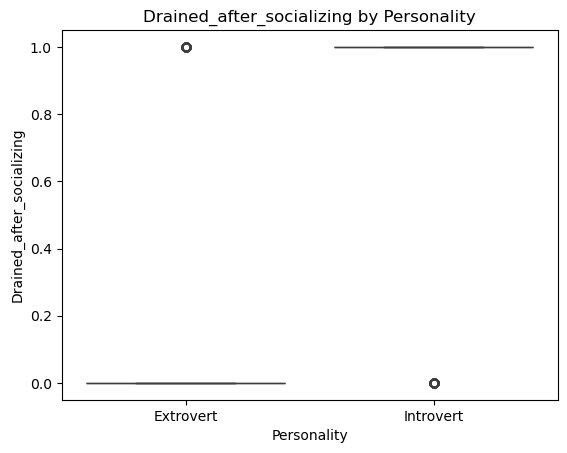

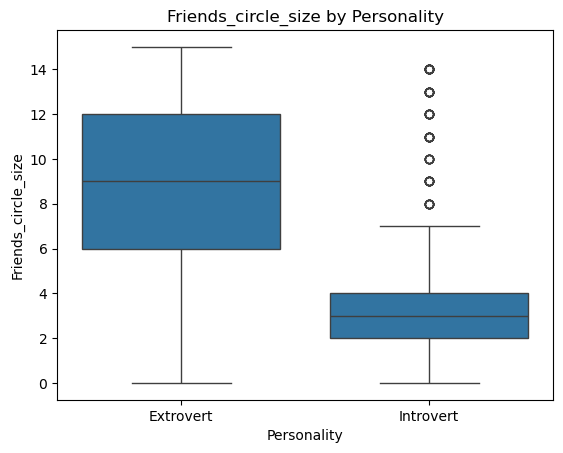

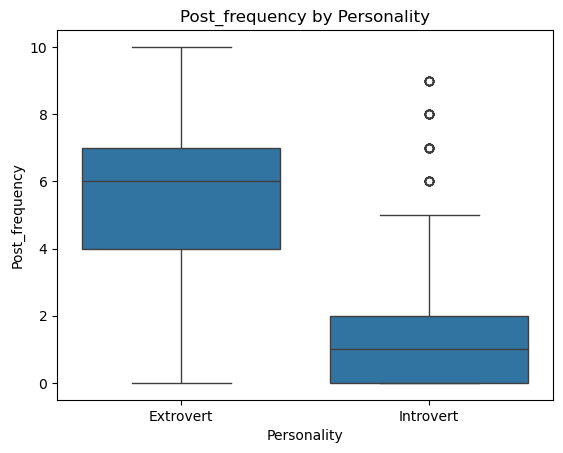

In [42]:
features = df.columns[:-1]  
for feature in features:
    sns.boxplot(data=df, x='Personality', y=feature)
    plt.xticks([0, 1], ['Extrovert', 'Introvert'])
    plt.title(f'{feature} by Personality')
    plt.show()


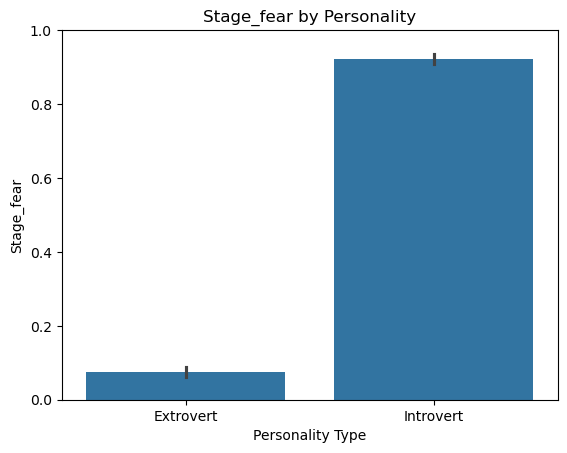

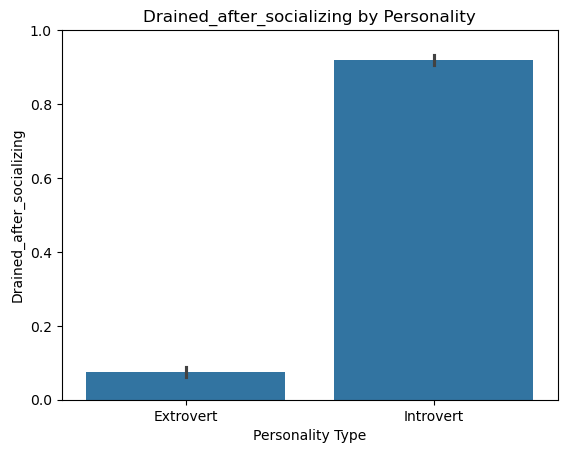

In [41]:
binary_features = ['Stage_fear', 'Drained_after_socializing']
for feature in binary_features:
    sns.barplot(x='Personality', y=feature, data=df)
    plt.xticks([0, 1], ['Extrovert', 'Introvert'])
    plt.xlabel('Personality Type')
    plt.title(f'{feature} by Personality')
    plt.ylim(0, 1)
    plt.show()


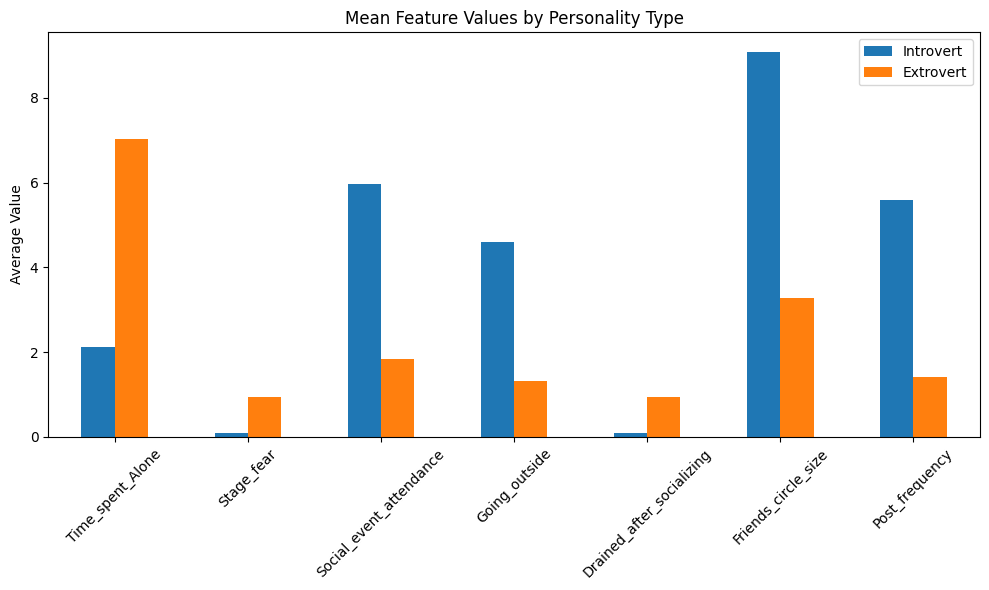

In [90]:
df_grouped = df.groupby('Personality').mean().T
df_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Feature Values by Personality Type')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(['Introvert', 'Extrovert'], loc='upper right')
plt.tight_layout()
plt.show()



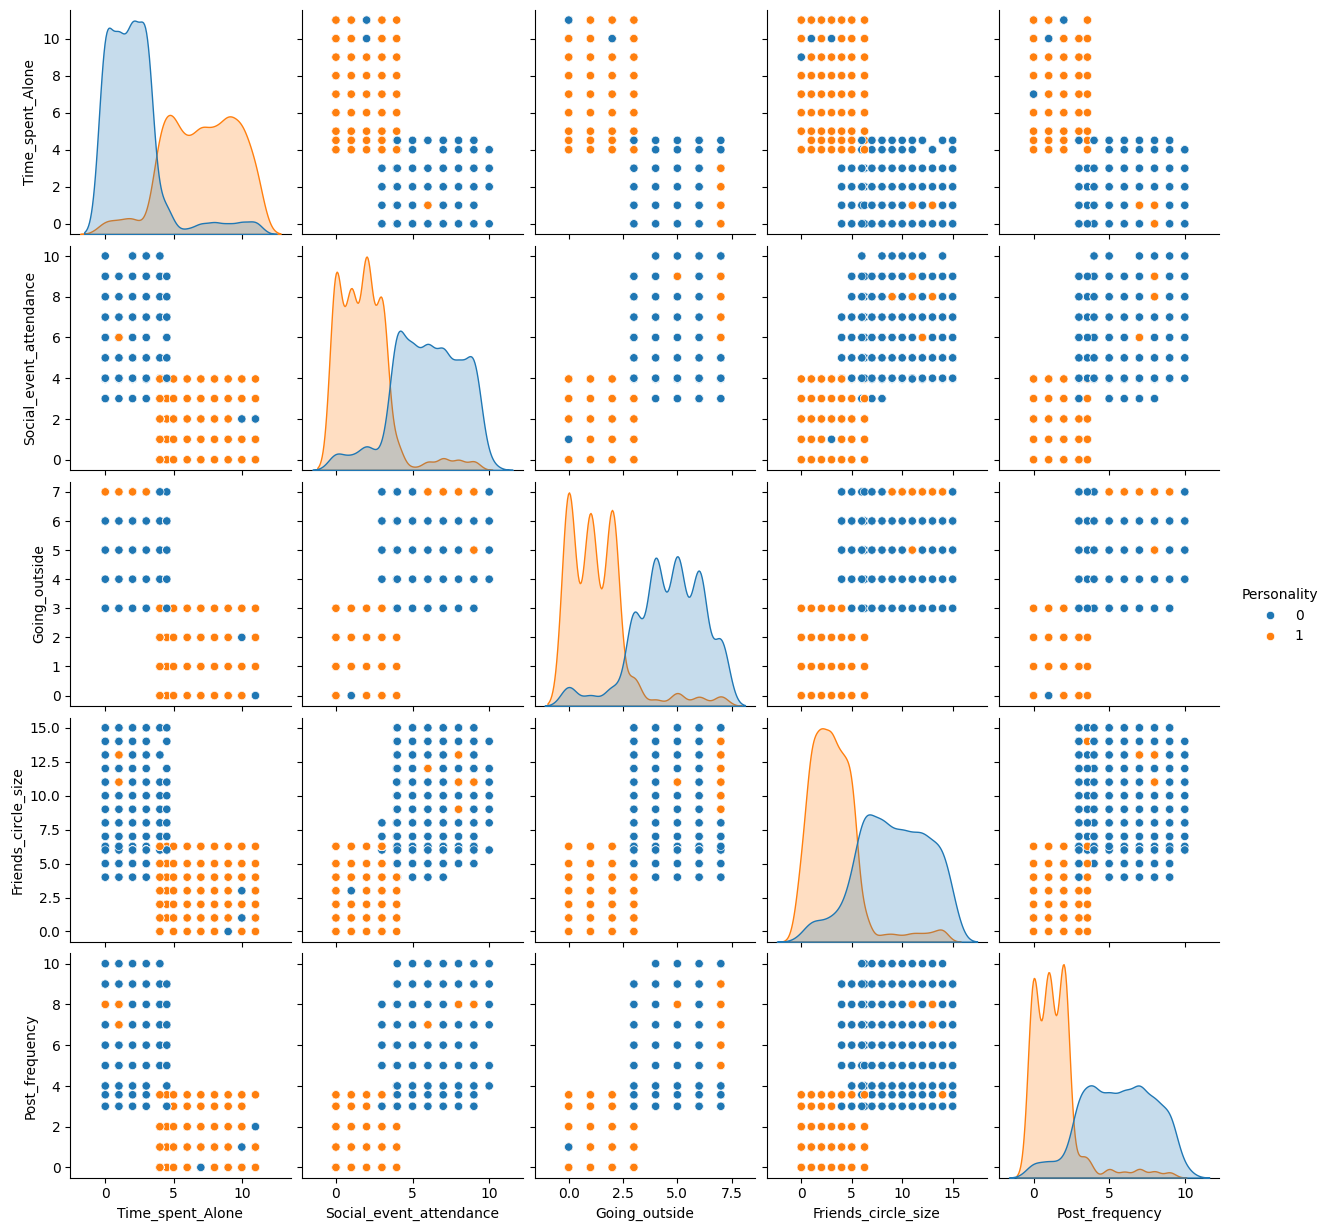

In [86]:
sns.pairplot(df, hue='Personality', diag_kind='kde', 
             vars=['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency'])
plt.show()
